In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import tree
from os import system

# Just a start, any suggestions on different algorithms?

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
frequency = pd.read_csv('frequency_domain_features_train.csv')

heart_rate = pd.read_csv('heart_rate_non_linear_features_train.csv')

time_domain = pd.read_csv('time_domain_features_train.csv')

In [3]:
frequency.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [4]:
heart_rate.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [5]:
time_domain.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [6]:
df_train = heart_rate.merge(frequency, how = 'inner', on = 'uuid')
df_train = df_train.merge(time_domain, how = 'inner', on = 'uuid')

train = df_train.sample(1000)

train.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition,VLF,VLF_PCT,LF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
237778,66403f0f-7574-4c2e-872d-13fe52e7571e,8.060510,134.886662,2.059638,1.176229,2,interruption,1602.213909,74.298023,536.938456,...,0.652782,0.257938,0.000015,-0.000086,0.014003,0.006935,0.006935,2.019195,0.652782,0.257938
140657,aef343fd-6161-4182-9bcd-1da1b063ce17,15.281364,135.879068,2.179748,1.232235,2,interruption,1778.240803,49.374174,1795.895058,...,-0.288070,0.068838,-0.000074,-0.001199,0.023021,0.012191,0.012191,1.888379,-0.288070,0.068838
346606,63000685-346c-40f3-abb5-2ee594ecf7ba,7.705983,83.115353,2.203397,1.098727,2,no stress,1404.220057,74.000003,487.925499,...,-0.347363,0.053569,-0.000158,-0.000193,0.012491,0.004608,0.004608,2.711036,-0.347363,0.053569
3052,737afa4f-76cc-4425-9a92-773deb09a19f,11.847343,211.334861,2.147074,1.116217,2,no stress,4815.377254,81.582680,1061.517294,...,0.073401,0.282527,-0.000285,-0.000223,0.020096,0.009185,0.009185,2.187891,0.073401,0.282527
10281,a0d276fd-a988-4858-a0b9-20912d234d8c,9.690084,94.280483,2.112930,1.285844,2,time pressure,1410.462465,72.041368,515.183968,...,1.719037,-0.389206,0.000022,-0.000245,0.016507,0.009748,0.009748,1.693408,1.719037,-0.389206


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 237778 to 88647
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SD1                      1000 non-null   float64
 1   SD2                      1000 non-null   float64
 2   sampen                   1000 non-null   float64
 3   higuci                   1000 non-null   float64
 4   datasetId                1000 non-null   int64  
 5   VLF                      1000 non-null   float64
 6   VLF_PCT                  1000 non-null   float64
 7   LF                       1000 non-null   float64
 8   LF_PCT                   1000 non-null   float64
 9   LF_NU                    1000 non-null   float64
 10  HF                       1000 non-null   float64
 11  HF_PCT                   1000 non-null   float64
 12  HF_NU                    1000 non-null   float64
 13  TP                       1000 non-null   float64
 14  LF_HF             

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SD1,1000.0,1.068720e+01,2.988433,3.933001,8.347661,10.406724,12.816114,18.658011
SD2,1000.0,1.563554e+02,111.810301,42.541430,91.951437,119.869624,165.366767,787.039225
sampen,1000.0,2.072104e+00,0.197839,0.784982,2.045724,2.143411,2.183874,2.229643
higuci,1000.0,1.181310e+00,0.061355,1.035755,1.138727,1.174804,1.223818,1.340765
datasetId,1000.0,2.000000e+00,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
VLF,1000.0,2.264667e+03,1873.582552,172.406217,1024.918581,1714.988217,2688.005847,11858.788627
VLF_PCT,1000.0,6.460225e+01,16.640809,19.760189,53.424846,66.448456,76.913719,97.347732
LF,1000.0,9.613308e+02,585.662186,100.557446,550.160352,795.075949,1244.991182,3134.440114
LF_PCT,1000.0,3.378272e+01,15.857930,2.578741,22.353165,31.696977,44.207346,77.258691
LF_NU,1000.0,9.560251e+01,3.888404,76.755100,93.646927,96.555876,98.704841,99.977561


In [9]:
# Checking for duplicates

duplicate = df_train[df_train.duplicated()]

duplicate

,uuid,SD1,SD2,sampen,higuci,datasetId,condition,VLF,VLF_PCT,LF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR


### No duplicates detected.

In [10]:
train = pd.get_dummies(train, columns=['condition'])

In [11]:
train

,uuid,SD1,SD2,sampen,higuci,datasetId,VLF,VLF_PCT,LF,LF_PCT,...,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress,condition_time pressure
237778,66403f0f-7574-4c2e-872d-13fe52e7571e,8.060510,134.886662,2.059638,1.176229,2,1602.213909,74.298023,536.938456,24.898964,...,-0.000086,0.014003,0.006935,0.006935,2.019195,0.652782,0.257938,1,0,0
140657,aef343fd-6161-4182-9bcd-1da1b063ce17,15.281364,135.879068,2.179748,1.232235,2,1778.240803,49.374174,1795.895058,49.864358,...,-0.001199,0.023021,0.012191,0.012191,1.888379,-0.288070,0.068838,1,0,0
346606,63000685-346c-40f3-abb5-2ee594ecf7ba,7.705983,83.115353,2.203397,1.098727,2,1404.220057,74.000003,487.925499,25.712842,...,-0.000193,0.012491,0.004608,0.004608,2.711036,-0.347363,0.053569,0,1,0
3052,737afa4f-76cc-4425-9a92-773deb09a19f,11.847343,211.334861,2.147074,1.116217,2,4815.377254,81.582680,1061.517294,17.984349,...,-0.000223,0.020096,0.009185,0.009185,2.187891,0.073401,0.282527,0,1,0
10281,a0d276fd-a988-4858-a0b9-20912d234d8c,9.690084,94.280483,2.112930,1.285844,2,1410.462465,72.041368,515.183968,26.313751,...,-0.000245,0.016507,0.009748,0.009748,1.693408,1.719037,-0.389206,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323511,80a91466-048b-4078-866c-40526a4b7ede,10.275728,63.153487,2.208784,1.339211,2,456.342399,40.451545,570.349214,50.557448,...,-0.000333,0.019839,0.013597,0.013597,1.459059,-0.403443,-0.297158,1,0,0
237201,d01a29e3-3f50-4c4e-8cbd-b964e2e3e72c,6.601993,61.527288,2.184708,1.293529,2,572.046455,64.300074,286.003628,32.147834,...,0.000107,0.012314,0.007709,0.007709,1.597414,-0.063071,-0.294677,1,0,0
280915,4225b807-c9db-4dad-9308-8fa02231c265,13.073333,179.670969,2.077140,1.136337,2,2649.693691,61.246470,1659.417073,38.356674,...,0.000153,0.021773,0.009343,0.009343,2.330404,-0.196876,-0.649162,0,0,1
264356,a3950d10-9408-470e-97e7-a40a112879bb,15.077603,200.249270,2.136449,1.115346,2,5520.274393,77.384440,1607.753509,22.537848,...,0.000104,0.022381,0.008836,0.008836,2.532797,0.720213,-0.410352,1,0,0


In [12]:
train.drop('uuid', inplace=True, axis=1)

In [37]:
# Preparing data model

cols = [col for col in train.columns if col != 'HR']
X = train[cols]
y = train['HR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [38]:
X_train.shape, X_test.shape

((750, 37), (200, 37))

In [39]:
y_train.shape, y_test.shape

((750,), (200,))

In [40]:
X_train.shape, X_val.shape

((750, 37), (250, 37))

In [41]:
y_train.shape, y_val.shape

((750,), (250,))

In [42]:
# Scaling the training/validation/test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)

scaler.fit_transform(X_val)

scaler.fit_transform(X_test)

array([[ 2.22152272, -0.39403205,  0.7600835 , ...,  1.45773797,
        -1.03046381, -0.4445276 ],
       [-0.68641787, -0.30971775, -0.02177995, ..., -0.68599434,
         0.97043679, -0.4445276 ],
       [-1.31771957, -0.7531216 ,  0.51776063, ...,  1.45773797,
        -1.03046381, -0.4445276 ],
       ...,
       [-0.06401577,  0.38079944, -1.22780669, ..., -0.68599434,
         0.97043679, -0.4445276 ],
       [ 0.17618855,  0.44725324,  0.45260171, ..., -0.68599434,
         0.97043679, -0.4445276 ],
       [ 0.4452803 , -0.2785555 ,  0.26528349, ...,  1.45773797,
        -1.03046381, -0.4445276 ]])

<AxesSubplot:>

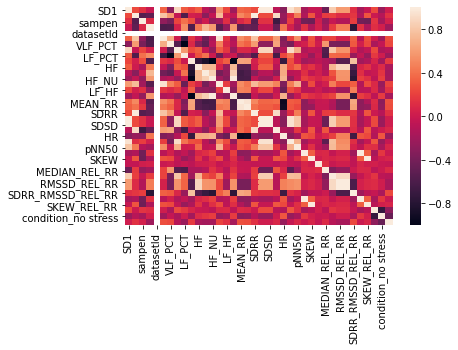

In [43]:
sb.heatmap(train.corr())

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print("Model Performance")
    print("Mean Absolute Error: {:0.4f}.".format(mae))
    print("Mean Squared Error: {:0.4f}.".format(mse))
    print("R^2 Score: {:0.4f}.".format(mae))
    print("Accuracy: {:0.2f}.".format(accuracy))

In [45]:
# Creating baseline performance report

baseline_y = [y_train.median()] * len(y_val)

base_predictions = baseline_y
base_mae = mean_absolute_error(y_val, base_predictions)
base_mse = mean_squared_error(y_val, base_predictions)
base_r2 = r2_score(y_val, base_predictions)
base_errors = abs(base_predictions - y_val)
base_mape = 100 * np.mean(base_errors / y_val)
base_accuracy = 100 - base_mape

print("Model Performance")
print("Mean Absolute Error: {:0.4f}.".format(base_mae))
print("Mean Squared Error: {:0.4f}.".format(base_mse))
print("R^2 Score: {:0.4f}.".format(base_r2))
print("Accuracy: {:0.2f}.".format(base_accuracy))

Model Performance
Mean Absolute Error: 8.5390.
Mean Squared Error: 113.2862.
R^2 Score: -0.0023.
Accuracy: 88.17.


C:\Users\William\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.5792474050057, tolerance: 7.598068085316166
  positive)


Text(0, 0.5, 'Coefficients')

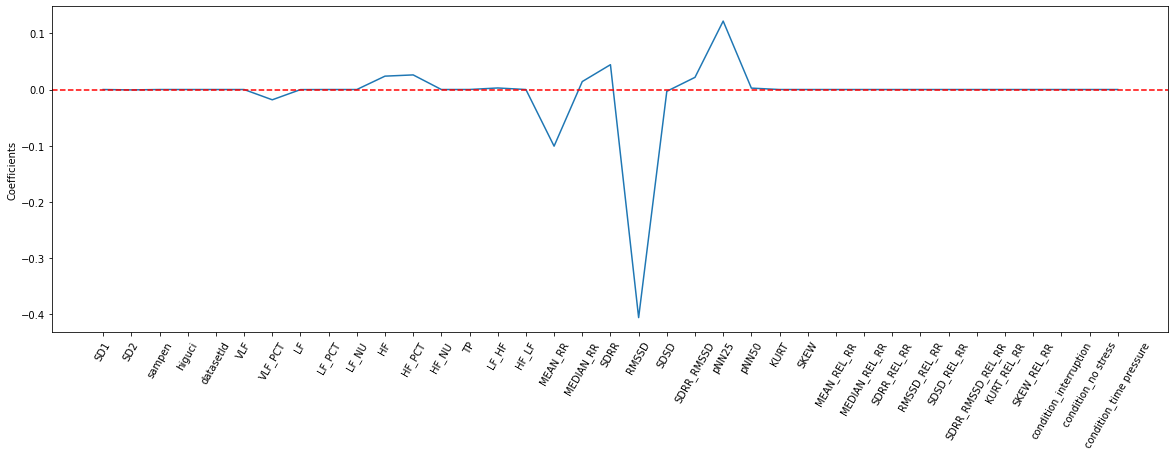

In [22]:
# Building lasso regression model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Fitting model to training data

lasso.fit(X_train, y_train)

# Extracting coefficients

lasso_coef = lasso.coef_

# Plotting coefficients

plt.figure(figsize=(20, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

In [54]:
cols = ['VLF_PCT', 'HF', 'HF_PCT', 'MEAN_RR', 'RMSSD', 'pNN25', 'KURT', 'SKEW']

cols_to_drop = [col for col in X_train.columns if col not in cols]

X_train.drop(cols_to_drop, inplace=True, axis=1)

C:\Users\William\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
X_train.columns

Index(['VLF_PCT', 'HF', 'HF_PCT', 'MEAN_RR', 'RMSSD', 'pNN25', 'KURT', 'SKEW'], dtype='object')

In [56]:
X_val.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

In [58]:
print(X_val.columns)
print(X_test.columns)

Index(['VLF_PCT', 'HF', 'HF_PCT', 'MEAN_RR', 'RMSSD', 'pNN25', 'KURT', 'SKEW'], dtype='object')
Index(['VLF_PCT', 'HF', 'HF_PCT', 'MEAN_RR', 'RMSSD', 'pNN25', 'KURT', 'SKEW'], dtype='object')


In [59]:
# Building linear regression model

model = LinearRegression()

In [60]:
# Fitting lr model to training data

mlr = model.fit(X_train, y_train)

# Evaluating performance

scoring(mlr, X_val, y_val)

Model Performance
Mean Absolute Error: 1.7886.
Mean Squared Error: 6.5897.
R^2 Score: 1.7886.
Accuracy: 97.66.


In [61]:
# Building Random Forest model

rf_model = RandomForestRegressor(random_state=7)

# Fitting model to training data

rf = rf_model.fit(X_train, y_train)

# Evaluating performance

scoring(rf, X_val, y_val)

Model Performance
Mean Absolute Error: 0.6471.
Mean Squared Error: 1.2485.
R^2 Score: 0.6471.
Accuracy: 99.15.


In [62]:
# Building Bagging model

bg_model = BaggingRegressor(random_state=7)

# Fitting model to training data

bg = bg_model.fit(X_train, y_train)

# Evaluating performance

scoring(bg, X_val, y_val)

Model Performance
Mean Absolute Error: 0.6380.
Mean Squared Error: 1.2978.
R^2 Score: 0.6380.
Accuracy: 99.16.


In [63]:
# Building Boosting model

ab_model = AdaBoostRegressor(random_state=7)

# Fitting model to training data

ab = ab_model.fit(X_train, y_train)

# Evaluating performance

scoring(ab, X_val, y_val)

Model Performance
Mean Absolute Error: 1.5979.
Mean Squared Error: 3.8767.
R^2 Score: 1.5979.
Accuracy: 97.79.


In [64]:
# Importing KFold and Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
# Defining a function that compares the cross-validation performance of the previously run models

def cv_comparison(models, X, y, cv):
    # Creating a dataframe to contain all averages and measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV on each model, and add the average scores and CV scores to the dataframe
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2 Error', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [66]:
# Create models to be tested

lr2 = LinearRegression()
rf2 = RandomForestRegressor(random_state=7)
bg2 = BaggingRegressor(random_state=7)
ab2 = AdaBoostRegressor(random_state=7)

# Putting models in a list to be used for Cross-Validation

models = [lr2, rf2, bg2, ab2]

# Running cross-validation on models

comp, maes, mses, r2s, accs = cv_comparison(models, X_train, y_train, 4)
comp.columns = ['Linear Regression', 'Random Forest', 'Bagging', 'AdaBoost']
comp

,Linear Regression,Random Forest,Bagging,AdaBoost
Mean Absolute Error,1.7726,0.7147,0.7696,1.7174
Mean Squared Error,6.7247,1.8532,2.0926,4.6730
R^2 Error,0.9340,0.9816,0.9792,0.9536
Accuracy,97.5915,99.0289,98.9543,97.6664


In [67]:
# Creating hyperparameter grid for Random Forest

# Number of trees in Random Forest

rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Max number of levels in tree

rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]

# Adding default as possible value

rf_max_depth.append(None)

# Number of features to consider at every split

rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on

rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node

rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen

rf_min_impurity_decrease = [0.0, 0.5, 0.1]

# Method of selecting samples for training each tree

rf_bootstrap = [True, False]

# Creating the grid

rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'max_features': rf_max_features,
           'criterion': rf_criterion,
           'min_samples_split': rf_min_samples_split,
           'min_impurity_decrease': rf_min_impurity_decrease,
           'bootstrap': rf_bootstrap}

In [68]:
rf_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['mse', 'mae'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.5, 0.1],
 'bootstrap': [True, False]}

In [69]:
# Hyperparameter Tuning for Random Forest using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating model to be tuned

rf_3 = RandomForestRegressor()

# Creating randomized Random Forest

rf_random = RandomizedSearchCV(estimator=rf_3, param_distributions=rf_grid, n_iter=200, cv=5, verbose=2, random_state=7, n_jobs=-1)

# Fitting the random search model

rf_random.fit(X_train, y_train)

# View best parameters

rf_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 41.5min finished


{'n_estimators': 800,
 'min_samples_split': 3,
 'min_impurity_decrease': 0.0,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mse',
 'bootstrap': True}

In [81]:
import xgboost as xb

In [84]:
# Create regressor
xgb = xb.XGBRegressor(random_state=7)

In [86]:
# Fit model to training data
xbgr = xgb.fit(X_train, y_train)

In [87]:
scoring(xgb, X_val, y_val)

Model Performance
Mean Absolute Error: 0.5939.
Mean Squared Error: 0.9341.
R^2 Score: 0.5939.
Accuracy: 99.21.


In [89]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instances needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

xgb_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
 'eta': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6],
 'gamma': [0, 0, 0, 0, 0, 0],
 'objective': ['reg:squarederror', 'reg:squaredlogerror']}

In [90]:
xgb_base = xb.XGBRegressor()

xgb_random = RandomizedSearchCV(estimator=xgb_base, param_distributions=xgb_grid,
                                n_iter=200, cv=5, verbose=2, random_state=7, n_jobs=-1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


{'tree_method': 'approx',
 'objective': 'reg:squarederror',
 'n_estimators': 1200,
 'min_child_weight': 8,
 'max_depth': 12,
 'gamma': 0,
 'eta': 0.1}

In [94]:
# Creating the final XGB

xgb_final = xb.XGBRegressor(tree_method='approx',
                            objective='reg:squarederror',
                            n_estimators=1200,
                            min_child_weight=8,
                            max_depth=12,
                            gamma=0,
                            eta=0.1)

xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=12,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [92]:
# Creating the final Random Forest
rf_final = RandomForestRegressor(n_estimators=200,
                                 min_samples_split=4,
                                 min_impurity_decrease=0.0,
                                 max_features='log2',
                                 max_depth=25,
                                 criterion='mse',
                                 bootstrap=False)

rf_final.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2',
                      min_samples_split=4, n_estimators=200)

In [93]:
# Defining function that compares all final models

def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2 Error', 'Accuracy']
    return scores

In [95]:
final_scores =  final_comparison([rf_final, xgb_final], X_test, y_test)

In [96]:
final_scores.columns = ['Random Forest', 'Extreme Gradient Boosting']

In [97]:
final_scores

,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,0.7134,0.6467
Mean Squared Error,1.4467,1.3379
R^2 Error,0.9877,0.9886
Accuracy,99.0724,99.1441
